In [2]:
import sys
from pathlib import Path
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


files_path = str(Path().cwd().parent)
sys.path.insert(0, files_path)

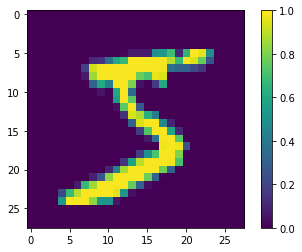

In [3]:
threshold = False

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalize dataset
# source: https://www.tensorflow.org/quantum/tutorials/mnist
x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0

#    apply threshold
if threshold:
    black_or_white = np.vectorize(lambda x : 0 if x < 0.5 else 1)
    x_train = black_or_white(x_train)
    x_test = black_or_white(x_test)
# x_test = black_or_white(x_test)

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()
plt.show()

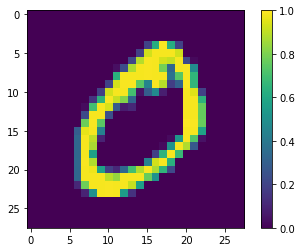

In [4]:
plt.imshow(x_train[1, :, :, 0])
plt.colorbar()
plt.show()

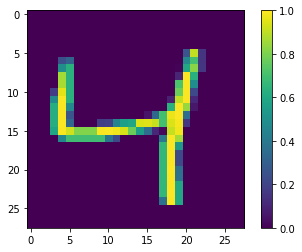

In [5]:
plt.imshow(x_train[2, :, :, 0])
plt.colorbar()
plt.show()

There is not a big different between 0.4, 0.5, 0.6 

In [6]:
df_train = pd.DataFrame( x_train[:, :, :, 0].reshape(x_train[:, :, :, 0].shape[0], 28*28))
df_train["label"] = y_train
# df_test = pd.DataFrame( x_test[:, :, :, 0].reshape(x_test[:, :, :, 0].shape[0], 28*28))
# df_test["label"] = y_test

# df = pd.concat([df_train, df_test])
# df.reset_index(inplace=True, drop=True)
X_train = df_train.drop(['label'], axis=1)
y_train = df_train['label']

In [7]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


# shifting

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation


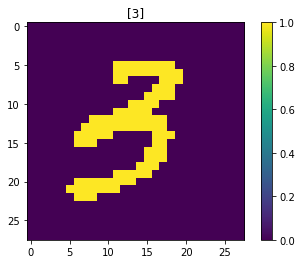

In [118]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from itertools import chain

def __apply_generator(img_gen, X_train, y_train):
    img_gen.fit(X_train, seed=1)
    return img_gen.flow(X_train, y_train, batch_size=1, shuffle=True)


def __rotate_image(X_train, y_train):
    img_gen = ImageDataGenerator(rotation_range=90, fill_mode="nearest")
    return __apply_generator(img_gen, X_train, y_train)


def __shift_image(X_train, y_train):
    img_gen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, fill_mode="nearest")
    return __apply_generator(img_gen, X_train, y_train)


def __zoom_image(X_train, y_train):
    img_gen = ImageDataGenerator(zoom_range=4, fill_mode="nearest")
    return __apply_generator(img_gen, X_train, y_train)


def __shear_image(X_train, y_train):
    img_gen = ImageDataGenerator(shear_range=150, fill_mode="nearest")
    return __apply_generator(img_gen, X_train, y_train)


def __apply_all_augmentation(X_train, y_train):
    img_gen = ImageDataGenerator(
        shear_range=5,
        zoom_range=0.5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rotation_range=30,
        fill_mode="nearest",
    )
    return __apply_generator(img_gen, X_train, y_train)


def aquire_data(threshold, augment_data):

    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

    # convert from int to float and normalize
    X_train, X_test = X_train.astype("float32") / 255, X_test.astype("float32") / 255


    # augment data!
    # train_generator = chain(zip(X_train, y_train))
    train_generator = chain()
    if augment_data.get("rotate", None):
        train_generator = chain(train_generator, __rotate_image(X_train, y_train))

    if augment_data.get("shift", None):
        train_generator = chain(train_generator, __shift_image(X_train, y_train))

    if augment_data.get("zoom", None):
        train_generator = chain(train_generator, __zoom_image(X_train, y_train))

    if augment_data.get("shear", None):
        train_generator = chain(train_generator, __shear_image(X_train, y_train))

    if augment_data.get("all", None):
        train_generator = chain(train_generator, __apply_all_augmentation(X_train, y_train))
    
    if threshold:
        black_or_white = np.vectorize(lambda x: 0 if x < 0.5 else 1)
        return map(lambda x: (black_or_white(x[0]), x[1]), train_generator), zip(X_test, y_test)
    
    return train_generator, zip(X_test, y_test)


data_preprocess_params = {
    "threshold": True,
    "augment_data": {"rotate": False, "shift": False, "zoom": False, "shear": False, "all": True},
}

train, test = aquire_data(**data_preprocess_params)


for i,(x, y) in enumerate(train):
    plt.imshow(x.reshape(28, 28))
    plt.title(y)
    plt.colorbar()
    plt.show()
    break